# CLustering is the ML unsupervised methods,used to group the data based on similaries in the data - Hierarchial clustering 

# Hierarchial clustering

In [1]:
# similar records will be clubbed together 
# DO EDA process - not mandatory(few are mandatory)
# scale the data
# calculate the distance - Euclidean or manhatten
# cluster the records based on single/complete link ('least /farthest ' distance)
# divide in the clusters into 2 or 3 classes based on the requirement
# use dendogram to visualise the clustered data
#join the classes with main data

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
# Reading the dataset
data = pd.read_csv('segmentation_data.csv',header='infer')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
data.shape

(2000, 8)

In [7]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
cor = data.corr()
cor

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [9]:
import seaborn as sns

<AxesSubplot:>

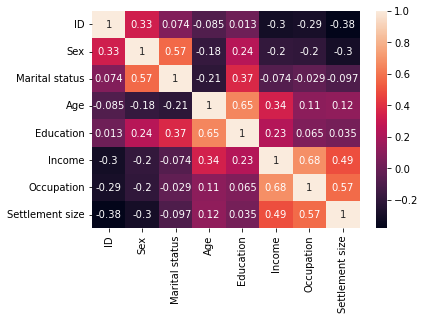

In [10]:
sns.heatmap(cor,annot=True)

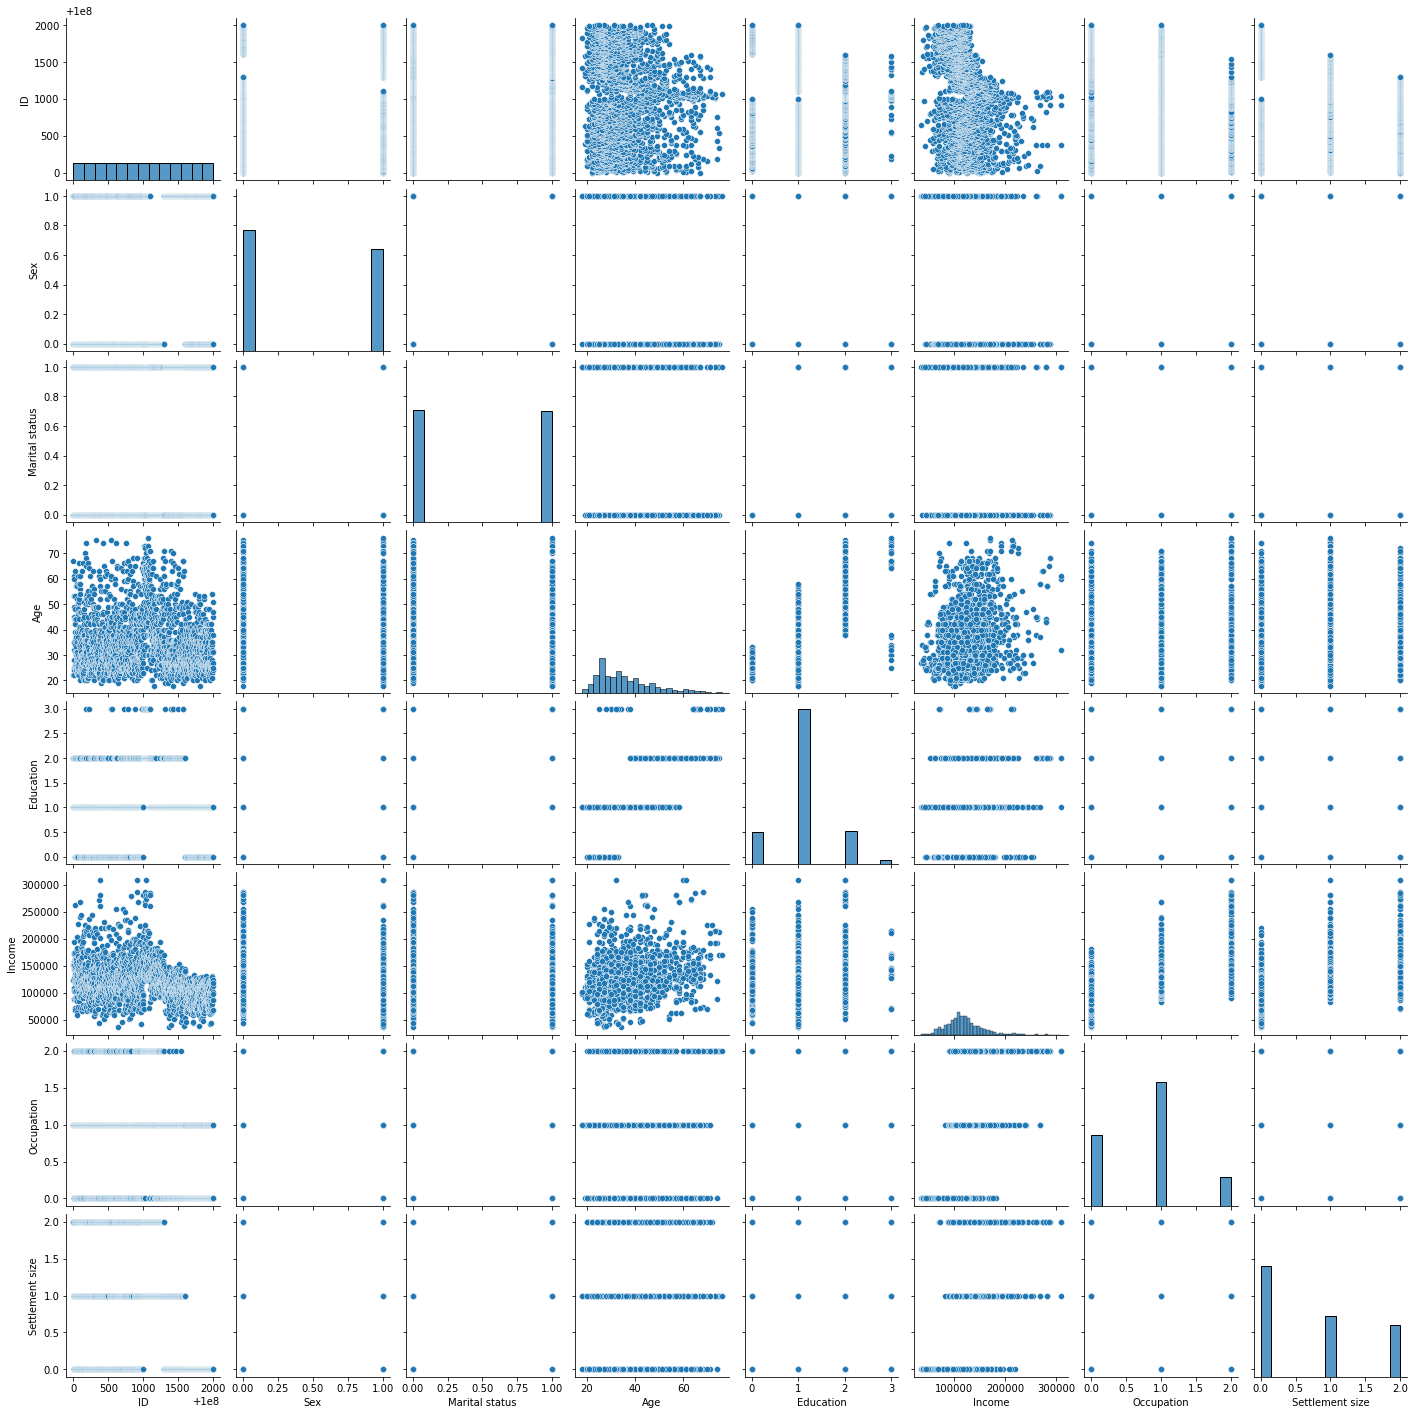

In [11]:
sns.pairplot(data)

In [12]:
data.drop(columns=['ID'],axis=1,inplace=True)

In [13]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [14]:
names = data.columns

In [15]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [16]:
from sklearn import preprocessing

In [17]:
data = preprocessing.minmax_scale(data,feature_range=(0,1))  #scaling the data

In [18]:
data

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

In [19]:
data = pd.DataFrame(data,columns=names) #scaled data will convert to array,so converting to dataframe

In [20]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [21]:
# using dendogram to find optimal no of clusters
import scipy.cluster.hierarchy as sch
import matplotlib as plt

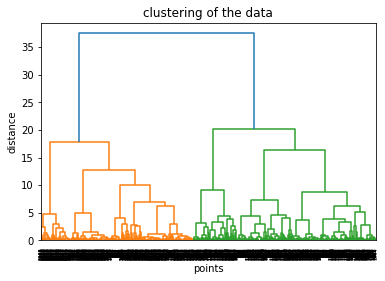

In [22]:
dendogram = sch.dendrogram(sch.linkage(data,method="ward")) # calculates euclidean distance and classfy by default
plt.pyplot.title('clustering of the data')
plt.pyplot.ylabel('distance')
plt.pyplot.xlabel('points')
plt.pyplot.show()

In [23]:
from sklearn import cluster
import sklearn as sk

In [24]:
clus = cluster.AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='complete')
clus

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [25]:
clus.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [26]:
abc = clus.fit_predict(data)

In [27]:
hclusdata = pd.DataFrame(data,pd.Series(abc))

# Creating a labled data with the help of clustering model 

In [28]:
hclusdata['clus']= pd.Series(abc)

In [29]:
hclusdata.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clus
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,1
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0


In [30]:
y = hclusdata['clus']
x = hclusdata.drop(columns=['clus'],axis=1)

# splitting the test and train data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
print(x_train.shape)
print(x_test.shape)

(1400, 7)
(600, 7)


# Applying supervised learning on the data

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
rand_model = RandomForestClassifier()
tree_model =  tree.DecisionTreeClassifier()
xgb_model = GradientBoostingClassifier()

In [36]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

In [38]:
from sklearn import metrics

In [39]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

1.0
1.0
1.0


# K-means clustering

In [40]:
from scipy import spatial

In [41]:
wcss = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

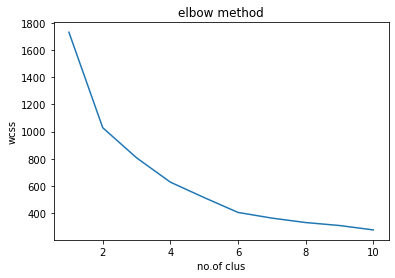

In [42]:
plt.pyplot.plot(range(1,11),wcss)
plt.pyplot.title('elbow method')
plt.pyplot.xlabel('no.of clus')
plt.pyplot.ylabel('wcss')
plt.pyplot.show()

In [43]:
km_model = cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [44]:
ykmeans = km_model.fit_predict(data)

In [45]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [46]:
data['kclus'] = pd.Series(ykmeans)

In [47]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kclus
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,2
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,1
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,2
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,2


In [48]:
y = data['kclus']
x = data.drop(columns=['kclus'],axis=1)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
rand_model = RandomForestClassifier()
tree_model =  tree.DecisionTreeClassifier()
xgb_model = GradientBoostingClassifier()

In [51]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [52]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

In [53]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

0.9933333333333333
0.9983333333333333
0.9983333333333333


# Saving the model

In [54]:
import pickle

In [55]:
pickle.dump(xgb_model,open("xgbmodel.pkl",'wb'))

In [56]:
pwd

'C:\\Users\\asus\\Downloads'